<a href="https://colab.research.google.com/github/astrovishalthakur/MachineLearning/blob/main/Clustering/KMeans/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
url = "https://raw.githubusercontent.com/astrovishalthakur/100-days-of-machine-learning/main/kmeans/student_clustering.csv"

In [ ]:
df = pd.read_csv(url)
df.shape

(200, 2)

In [ ]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [ ]:
import matplotlib.pyplot as plt

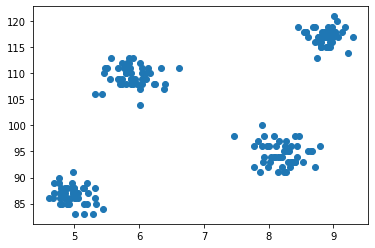

In [ ]:
plt.scatter(df.cgpa, df.iq)

In [ ]:
from sklearn.cluster import KMeans

WCSS = []

for i in range(1, 11):
  km = KMeans(n_clusters=i)
  km.fit_predict(df)
  WCSS.append(km.inertia_)

In [ ]:
WCSS

[29957.898288000004,
 4184.141270000001,
 2362.713349,
 681.9696600000003,
 523.7131894763967,
 388.85240268759804,
 326.49370944403074,
 249.93816785875322,
 202.00326945813595,
 182.12954374469126]

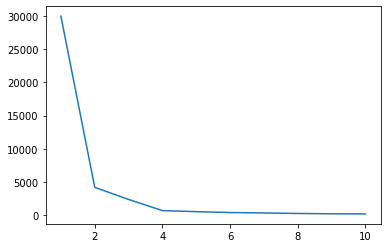

In [ ]:
plt.plot(range(1, 11), WCSS)

We can clearly see 4 is elbow point


In [ ]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

In [ ]:
y_means

array([0, 1, 2, 2, 1, 1, 2, 3, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       2, 0, 0, 2, 0, 3, 2, 1, 3, 1, 3, 1, 2, 2, 3, 1, 0, 1, 0, 2, 2, 0,
       3, 3, 2, 1, 3, 1, 0, 0, 3, 2, 3, 1, 1, 3, 1, 3, 1, 2, 2, 3, 0, 3,
       2, 0, 1, 2, 1, 3, 2, 0, 1, 3, 1, 3, 0, 2, 2, 3, 1, 0, 3, 0, 3, 1,
       3, 1, 3, 3, 2, 0, 2, 2, 3, 2, 0, 3, 1, 0, 0, 3, 0, 0, 2, 0, 3, 3,
       2, 3, 1, 1, 2, 3, 2, 1, 3, 0, 0, 1, 2, 3, 2, 0, 2, 1, 0, 2, 2, 1,
       0, 0, 1, 3, 1, 0, 2, 2, 2, 0, 1, 0, 0, 3, 0, 3, 1, 0, 3, 0, 3, 3,
       0, 2, 1, 3, 1, 2, 0, 3, 1, 2, 3, 0, 1, 0, 0, 3, 3, 1, 3, 0, 0, 2,
       3, 1, 0, 3, 3, 1, 1, 1, 2, 0, 2, 2, 3, 1, 2, 2, 0, 0, 2, 0, 3, 1,
       1, 3], dtype=int32)

In [ ]:
X[y_means == 0][:5] # top 5 rows in cluster 0

array([[ 5.13, 88.  ],
       [ 4.6 , 86.  ],
       [ 5.  , 88.  ],
       [ 4.86, 86.  ],
       [ 4.78, 87.  ]])

In [ ]:
X[y_means == 1][:5] # top 5 rows in cluster 1

array([[  5.9 , 113.  ],
       [  5.45, 110.  ],
       [  5.88, 109.  ],
       [  5.79, 110.  ],
       [  6.1 , 110.  ]])

In [ ]:
# to extract first values from this list
X[y_means == 2][:5, 0] # top 5 rows'cgpa in cluster 2

array([8.36, 8.27, 8.41, 8.09, 8.16])

In [ ]:
# to extract second values from this list
X[y_means == 3, 1][:5] # top 5 rows'IQ in cluster 3

array([115., 119., 117., 118., 118.])

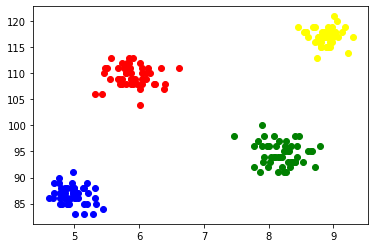

In [ ]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], color="Blue")
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], color="Red")
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], color="Green")
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], color="Yellow")

# KMeans on 3-D Data

In [ ]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)
X.shape

(200, 3)

In [ ]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:, 1], z=X[:, 2])
fig.show()

In [ ]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

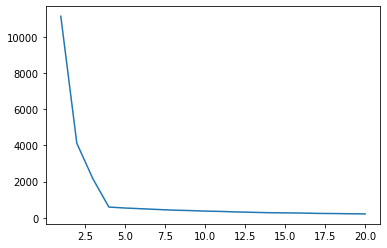

In [ ]:
plt.plot(range(1,21),wcss)

In [ ]:
km = KMeans(n_clusters=4)

y_pred = km.fit_predict(X)

df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()

In [ ]:
df.head()

,col1,col2,col3,label
0,4.334245,3.325804,-4.174970,1
1,-3.322467,3.221711,-4.625342,3
2,-6.072969,-4.134592,2.698461,0
3,6.904659,6.111057,-4.340950,1
4,-2.608392,2.950156,-2.234665,3
